# Eigenstates search 1-D quantum harmonic oscillator

In [1]:
using Pkg;
Pkg.activate("../../SchrodingerEquationSolver");
include("../src/SchrodingerEquationSolver.jl");
import .SchrodingerEquationSolver as ses
import .ses.Grids as Grids
import .ses.Potentials as Potentials
import .ses.MathUtils as MathUtils
import .ses.Hydrogen as Hydrogen
import .ses.InitialConditions as InitialConditions
import .ses.OneDSchrodingerEquationSolver as odses
import .ses.EigenvalueFinders as EigenvalueFinders
using Plots

  Activating project at `~/Desktop/physics_coding_projects/julia/SchrodingerEquationSolver`


In [2]:
# Space grid definition and creation
r_min::Float64=-12.0; #Where the space grid starts.
r_max::Float64=12.0; #Where the space grid ends.
N=40000; #Number of points in the space grind.
grid_stru= Grids.init_uniform_grid_structure(r_min, r_max, N); #Grid creation, grid is the list with the grid points.

### Quantum gausian well potential 
$v_{0}$: Magnitud of the potential.\

$v_0 * e^{-ax^2}$

In [3]:
v0::Float64=-10.0;

v_effe= Potentials.gaussian_potential(v0,grid_stru.grid); #the list with the gaussian potential

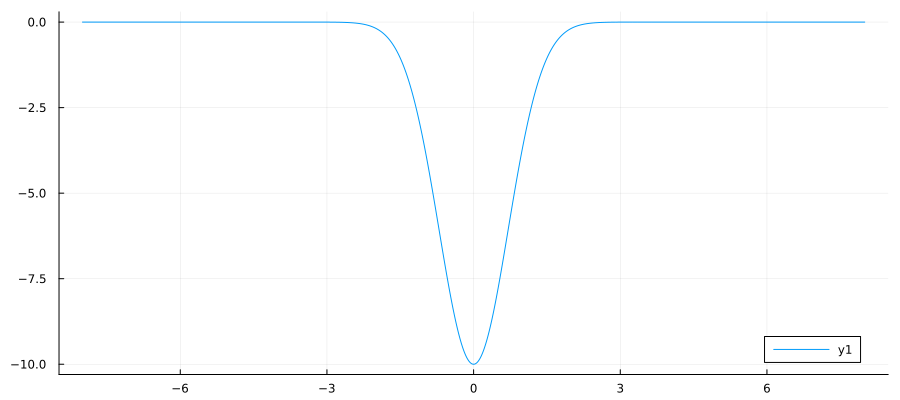

In [4]:
plot!(grid_stru.grid, v_effe)
plot!(size=(900,400))

In [4]:
#Energy grid definition and creation. The system searches the energy grid for potential 
#values for the eigenvalues of the Schrodinger equation 
E_max::Float64=-0.05; #Maximal energy in the energy grid.
E_min::Float64=-9.98; #Minimal energy in the energy grid.
E_N::Int64=400; #Number of points in the energy grid.
E_grid= Grids.uniform_grid(E_min, E_max, E_N); #List with the energy grid points.

In [5]:
#Search the energy grid, for intervals with promising eigenvalues, the fictitious_intervals, holds intervals
#resulting from matching forward and backward integrations.

#E_intervals, merge_ratio_of_E= EigenvalueFinders.find_eigenvalue_intervals(E_grid, v_effe, grid_stru,
#                                                                        InitialConditions.harmoic_oscillator_1D,
#                                                                        odses.solver_uniform_grid);

E_intervals= EigenvalueFinders.find_eigenvalue_intervals(E_grid, v_effe, grid_stru,
    InitialConditions.harmoic_oscillator_1D,
    odses.solver_uniform_grid);

In [6]:
E_intervals

4-element Vector{Tuple{Float64, Float64}}:
 (-7.964135338345866, -7.9392481203007526)
 (-4.280827067669174, -4.255939849624061)
 (-1.5432330827067684, -1.5183458646616543)
 (-0.074887218045113, -0.05000000000000071)

In [7]:
numb_solu::Int64= size(E_intervals)[1]; #Number of potential solutions in the energy grid.
eigen_list::Vector{Float64}=zeros(numb_solu); #Initializing the list that is going to hold the energy eigenvalues.
u_wave_functions::Vector{Vector{Float64}}= [zeros(N) for _ in 1:numb_solu]; #Initializing the list that holds the eigenfunctions list.

In [8]:
#Using Illinois algorithm to find the actual energy eigenvalue and eigenfunction for everyone of the energy intervals.
for (i, ei_interval) in enumerate(E_intervals)
    u_temp, ei_temp= EigenvalueFinders.illinois_eigenvalue_finder(ei_interval, v_effe, 
    grid_stru,InitialConditions.harmoic_oscillator_1D, 
    odses.solver_uniform_grid);
    u_wave_functions[i]=u_temp;
    eigen_list[i]= ei_temp;
end

In [9]:
#Printing the energies
eigen_list

4-element Vector{Float64}:
 -7.952670248742307
 -4.28060217561834
 -1.541950723244179
 -0.061136688426465795

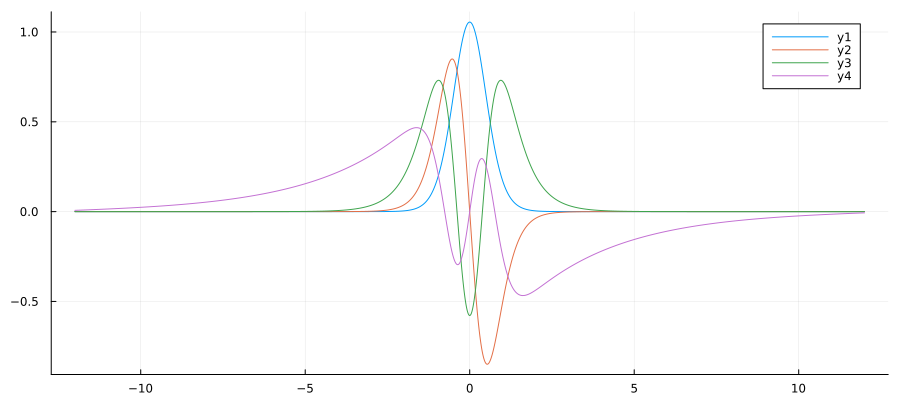

In [10]:
#Plot of the wave functions
plot!(grid_stru.grid, u_wave_functions)
plot!(size=(900,400))